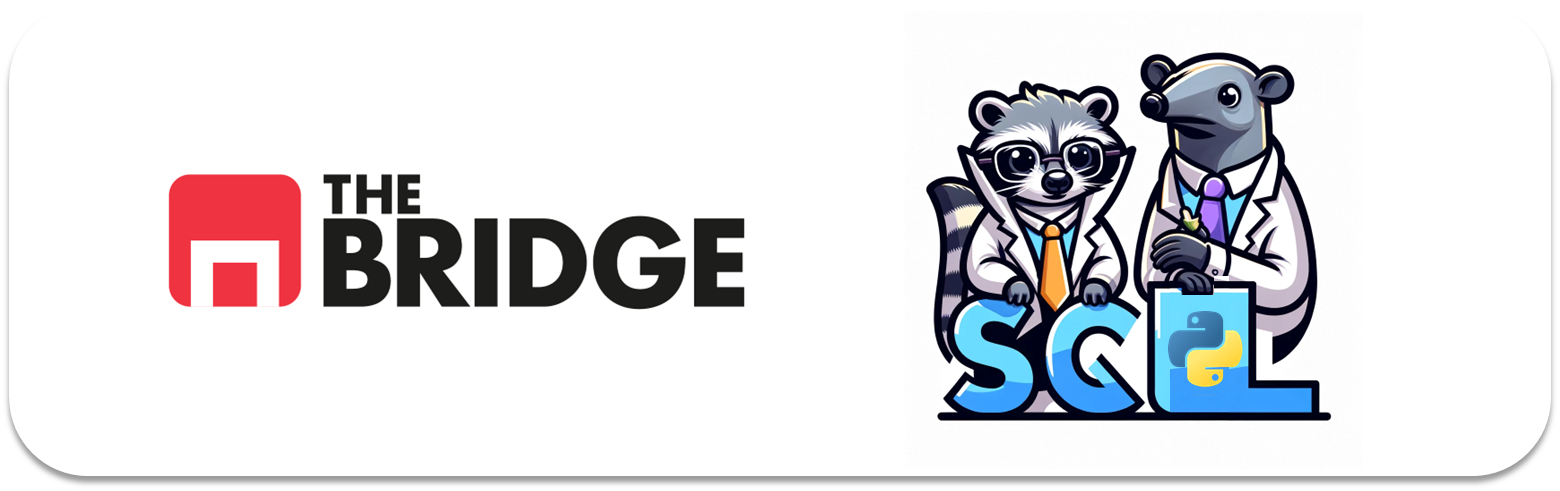


# Práctica Grupal: Diseño de Base de Datos

Para esta práctica se pide diseñar el modelo de datos con las tablas SQL, sus campos y tipos así como las relaciones de una base datos cuyas características se detallan a continuación.

## Especificaciones

Tenemos que diseñar una base de datos sobre proveedores y disponemos de la siguiente
información.

De cada proveedor conocemos:  
● Nombre  
● Dirección  
● Ciudad  
● Provincia  
● Código de proveedor (único para cada uno de ellos)  
  
Queremos llevar un control de las piezas que nos suministra cada proveedor. Es importante
conocer la cantidad de las diferentes piezas que nos suministra y en qué fecha lo hace. Un
mismo proveedor nos puede suministrar una pieza con el mismo código en diferentes
fechas.  

El diseño de la base de datos debe permitir almacenar un histórico con todas las fechas y
las cantidades que nos ha proporcionado un proveedor. Una misma pieza puede ser
suministrada por diferentes proveedores.  

De cada pieza conocemos:
- Código de pieza(único)
- Nombre
- Color
- Precio
- Categoría.  

Pueden existir varias categorías y cada categoría tiene:
- Nombre
- Código de categoría único
Una pieza sólo puede pertenecer a una categoría.

## Entregable y presentación

Se debe subir al repo un fichero con el modelo (en formato imagen o en ppt) y se hará una breve presentación del modelo y del proceso seguido para obtenerlo de no más de 10 minutos a finalizar el sprint 7.


## Extra:

Se puntuará extra entregar un notebook o script de python en el que se cree la base de datos y se rellenen con algunos datos representativos.






### Posibilidades gráficas

No es obligatorio utilizar un software específico para el diseño, de hecho es un modelo sencillo que puede generarse con unos dataframes y unas líneas en PowerPoint, pero si queréis probar aquí os dejamos dos enlaces a software con planes gratuitos:

[SqlDBM](https://sqldbm.com/)  
[LucidChart](https://www.lucidchart.com/pages/)



Y también podéis emplear la librería `graphviz`([doc aquí](https://pypi.org/project/graphviz/)) de python, aunque esta requiere instalar un software adicional ([Graphviz](https://www.graphviz.org/)). Esta librería sirve para dibujar grafos pero puede adaptarse (no de forma sencilla) para hacer modelos entidad/relacion.

In [1]:
# Primero vamos a usar un SDK (software development kit)
# En este caso, sqlite3 para conectarnos a una base de datos de tipo sqlite3
# Tenemos que buscar la documentación de sqlite3

In [1]:
#sqlite3
import sqlite3
con = sqlite3.connect("empresa.db")

In [2]:
# sacamos el cursor
cur = con.cursor()

In [3]:
cur.execute("CREATE TABLE IF NOT EXISTS categoria(id_categoria INTEGER PRIMARY KEY ASC, nombre TEXT)")

cur.execute("CREATE TABLE IF NOT EXISTS pieza(id_pieza INTEGER PRIMARY KEY ASC, nombre TEXT, color TEXT, precio REAL, categoria INTEGER, FOREIGN KEY(categoria) REFERENCES categoria(id_categoria))")

cur.execute("CREATE TABLE IF NOT EXISTS proveedor(id_pedido INTEGER PRIMARY KEY ASC, fecha TEXT, id_proveedor INTEGER, nombre TEXT, direccion TEXT, ciudad TEXT, provincia TEXT, cantidad INTEGER, pieza INTEGER, FOREIGN KEY(pieza) REFERENCES pieza(id_pieza))")




In [4]:
cur.execute("""
    INSERT OR REPLACE INTO categoria VALUES
        (1, 'Primera calidad'),
        (2, 'Segunda calidad')
""")

In [5]:
data = [
    (3, "Tercera calidad"),
    (4,"Cuarta calidad"),
    (5, "Quinta calidad")
]
cur.executemany("INSERT OR REPLACE INTO categoria VALUES(?, ?)", data)
con.commit()

In [6]:
res = cur.execute("SELECT * FROM categoria")
res.fetchall()

[(1, 'Primera calidad'),
 (2, 'Segunda calidad'),
 (3, 'Tercera calidad'),
 (4, 'Cuarta calidad'),
 (5, 'Quinta calidad')]

In [7]:
cur.execute("""
    INSERT OR REPLACE INTO pieza VALUES
        (1, 'Tornillo', 'azul', 22.5, 3),
        (2, 'Tornillo', 'negro', 20.5, 2),
        (3, 'Tuerca', 'rojo', 17.2, 2),
        (4, 'Tuerca', 'verde', 11.3, 1)
""")




In [8]:
con.commit()

res = cur.execute("SELECT * FROM pieza")
res.fetchall()

[(1, 'Tornillo', 'azul', 22.5, 3),
 (2, 'Tornillo', 'negro', 20.5, 2),
 (3, 'Tuerca', 'rojo', 17.2, 2),
 (4, 'Tuerca', 'verde', 11.3, 1)]

In [9]:
cur.execute("""
    INSERT OR REPLACE INTO proveedor VALUES
        (1, '2024-05-03', 2, "Juan", "Calle Mayor", "Madrid", "Madrid", 12, 4),
        (2, '2024-06-20', 2, "Carlos", "Calle pequeña", "Málaga", "Málaga", 7, 2),
        (3, '2024-04-25', 2, "Federica", "Avenida de luz", "Jaén", "Jaén", 80, 2),
        (4, '2024-04-23', 3, "Luisa", "Camino bajo", "Vigo", "Pontevedra", 13, 1),
        (5, '2024-03-19', 4, "Fernando", "Plaza Mayor", "Logroño", "La Rioja", 22, 1),
        (6, '2024-02-18', 2, "Juan", "Avenida del parque", "Bilbao", "Vizcaya", 300, 2),
        (7, '2024-02-17', 4, "Fernando", "polígono industrial", "Cádiz", "Cádiz", 200, 3)
        
        
""")


In [10]:
con.commit()

res = cur.execute("SELECT * FROM proveedor")
res.fetchall()

[(1, '2024-05-03', 2, 'Juan', 'Calle Mayor', 'Madrid', 'Madrid', 12, 4),
 (2, '2024-06-20', 2, 'Carlos', 'Calle pequeña', 'Málaga', 'Málaga', 7, 2),
 (3, '2024-04-25', 2, 'Federica', 'Avenida de luz', 'Jaén', 'Jaén', 80, 2),
 (4, '2024-04-23', 3, 'Luisa', 'Camino bajo', 'Vigo', 'Pontevedra', 13, 1),
 (5, '2024-03-19', 4, 'Fernando', 'Plaza Mayor', 'Logroño', 'La Rioja', 22, 1),
 (6,
  '2024-02-18',
  2,
  'Juan',
  'Avenida del parque',
  'Bilbao',
  'Vizcaya',
  300,
  2),
 (7,
  '2024-02-17',
  4,
  'Fernando',
  'polígono industrial',
  'Cádiz',
  'Cádiz',
  200,
  3)]

In [11]:
query = '''

SELECT * FROM 
(SELECT date(fecha, 'start of month') inicio_mes, id_proveedor, cantidad, ciudad, color, t1.nombre, t2.nombre, t2.categoria  FROM proveedor t1
LEFT JOIN pieza t2
ON t1.pieza = t2.id_pieza) t3
LEFT JOIN categoria t4
ON t3.categoria = t4.id_categoria
WHERE ciudad IN ("Madrid", "Málaga", "León")

'''

res = cur.execute(query)
res.fetchall()

[('2024-05-01',
  2,
  12,
  'Madrid',
  'verde',
  'Juan',
  'Tuerca',
  1,
  1,
  'Primera calidad'),
 ('2024-06-01',
  2,
  7,
  'Málaga',
  'negro',
  'Carlos',
  'Tornillo',
  2,
  2,
  'Segunda calidad')]

###### EXTRA 2: SQL_ALCHEMY (segunda opción)
###### SQL_ALCHEMY nos abstrae de la base de datos a la que nos conectamos
###### Necesito elegir bien el engine y el dialect, que dependen de a qué BBDD me conecto
###### Ya no tengo que saber nada más de sintaxis de sqlite3 o la bbdd que sea, solo SQL

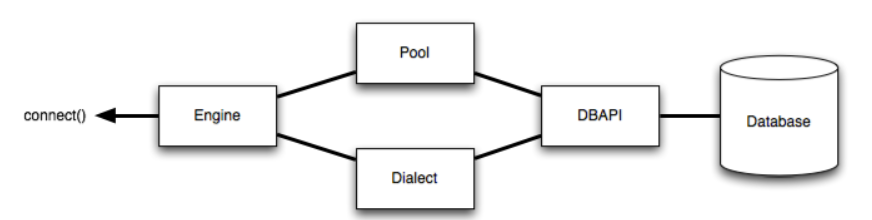

In [12]:

# 1.-Load module
import sqlalchemy
import pandas as pd

#2.-Turn on database engine
dbEngine=sqlalchemy.create_engine('sqlite:///empresa.db') # ensure this is the correct path for the sqlite file. 

#3.- Read data with pandas
df = pd.read_sql(sql = 'select * from proveedor',con = dbEngine)
display(df)

#4.- I also want to add a new table from a dataframe in sqlite (a small one) 

df_todb = pd.DataFrame()
df_todb['numeros'] = [1,2,3,4,5]
df_todb['distancias'] = [10, 20, 30, 40, 50]

df_todb.to_sql(name = 'tabla_nueva',con= dbEngine, index=False, if_exists='replace') 

query = '''

SELECT * FROM tabla_nueva

'''

res = cur.execute(query)
res.fetchall()

,id_pedido,fecha,id_proveedor,nombre,direccion,ciudad,provincia,cantidad,pieza
0,1,2024-05-03,2,Juan,Calle Mayor,Madrid,Madrid,12,4
1,2,2024-06-20,2,Carlos,Calle pequeña,Málaga,Málaga,7,2
2,3,2024-04-25,2,Federica,Avenida de luz,Jaén,Jaén,80,2
3,4,2024-04-23,3,Luisa,Camino bajo,Vigo,Pontevedra,13,1
4,5,2024-03-19,4,Fernando,Plaza Mayor,Logroño,La Rioja,22,1
5,6,2024-02-18,2,Juan,Avenida del parque,Bilbao,Vizcaya,300,2
6,7,2024-02-17,4,Fernando,polígono industrial,Cádiz,Cádiz,200,3


[(1, 10), (2, 20), (3, 30), (4, 40), (5, 50)]

In [13]:
# Borramos las tablas de la base de datos
query = '''
DROP TABLE IF EXISTS categoria;
'''

res = cur.execute(query)

query = '''
DROP TABLE IF EXISTS pieza;
'''
res = cur.execute(query)

query = '''
DROP TABLE IF EXISTS proveedor;
'''
res = cur.execute(query)

res.fetchall()

[]

In [1]:
# EXTRA 3: ORM (Object Relational Mapping)
# Es usar programación orientada a objetos (OOP object oriented programming)
# para interactuar con una base de datos relacional (base de datos con tablas)

import datetime

from typing import List
from typing import Optional
from sqlalchemy import ForeignKey
from sqlalchemy import String, Integer, Float, DateTime
from sqlalchemy.orm import DeclarativeBase
from sqlalchemy.orm import Mapped
from sqlalchemy.orm import mapped_column
from sqlalchemy.orm import relationship

class Base(DeclarativeBase):
    pass

class Categoria(Base): # Esto es que hereda de la clase Base
    __tablename__ = "categoria"
    id: Mapped[int] = mapped_column(primary_key=True)
    nombre: Mapped[str] = mapped_column(String(30))
    
    #field_data = relationship("Pieza", backref="categoria", uselist=False) 
    
    def __repr__(self) -> str:
        return f"Categoria(id={self.id!r}, nombre={self.nombre!r})"
        #https://stackoverflow.com/questions/38418070/what-does-r-do-in-str-and-repr


class Pieza(Base):
    __tablename__ = "pieza"
    id: Mapped[int] = mapped_column(primary_key=True)
    nombre: Mapped[str] = mapped_column(String(30))
    color: Mapped[str] = mapped_column(String(30))
    precio: Mapped[float] = mapped_column(Float)
    categoria: Mapped["Categoria"] = mapped_column(Integer,ForeignKey(Categoria.id))
    
    #field_data = relationship("Proveedor", backref="pieza", uselist=False) 
    
    def __repr__(self) -> str:
        return f"Pieza(id={self.id!r}, nombre={self.nombre!r}, color={self.color!r}, precio={self.precio!r})"

class Proveedor(Base):
    __tablename__ = "proveedor"
    id: Mapped[int] = mapped_column(primary_key=True)
    fecha: Mapped[datetime.datetime] = mapped_column(DateTime)
    id_proveedor: Mapped[int] = mapped_column(Integer)
    nombre: Mapped[str] = mapped_column(String(30))
    direccion: Mapped[str] = mapped_column(String(30))
    ciudad: Mapped[str] = mapped_column(String(30))
    provincia: Mapped[str] = mapped_column(String(30))
    cantidad: Mapped[int] = mapped_column(Integer)
    pieza: Mapped[int] = mapped_column(Integer,ForeignKey(Pieza.id))
    
    def __repr__(self) -> str:
        return f"""Proveedor(id={self.id!r},
    fecha={self.fecha!r},
    id_proveedor={self.id_proveedor!r}),
    nombre={self.nombre!r},
    direccion={self.direccion!r}),
    ciudad={self.ciudad!r},
    provincia={self.provincia!r}),
    cantidad={self.cantidad!r},
    pieza={self.pieza!r}),
    """



In [2]:
from sqlalchemy import create_engine
engine = create_engine("sqlite://", echo=True)

In [3]:
Base.metadata.create_all(engine)

2024-07-15 18:49:25,812 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-15 18:49:25,813 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("categoria")
2024-07-15 18:49:25,814 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-15 18:49:25,816 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("categoria")
2024-07-15 18:49:25,817 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-15 18:49:25,818 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("pieza")
2024-07-15 18:49:25,820 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-15 18:49:25,821 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("pieza")
2024-07-15 18:49:25,822 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-15 18:49:25,824 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("proveedor")
2024-07-15 18:49:25,824 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-15 18:49:25,825 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("proveedor")
2024-07-15 18:49:25,826 INFO sqlalchemy.engine.Engine [raw sql

In [4]:
from sqlalchemy.orm import Session

# Insertamos datos

with Session(engine) as session:
    categoria1 = Categoria(nombre="Primera calidad")
    categoria2 = Categoria(nombre="Segunda calidad")
    categoria3 = Categoria(nombre="Tercera calidad")
    categoria4 = Categoria(nombre="Cuarta calidad")
    categoria5 = Categoria(nombre="Quinta calidad")
    
    session.add_all([categoria1, categoria2, categoria3, categoria4, categoria5])
    
    pieza1 = Pieza(nombre='Tornillo', color='azul', precio=22.5, categoria=3)
    pieza2 = Pieza(nombre='Tornillo', color='azul', precio=22.5, categoria=3)
    pieza3 = Pieza(nombre='Tornillo', color='negro', precio=20.5, categoria=2)
    pieza4 = Pieza(nombre='Tuerca', color='rojo', precio=17.2, categoria=2)
    pieza5 = Pieza(nombre='Tuerca', color='verde', precio=11.3, categoria=1)
    
    session.add_all([pieza1, pieza2, pieza3, pieza4, pieza5])
    
    proveedor1 = Proveedor(fecha=datetime.datetime(year=2024,month=5,day=3), id = 1, id_proveedor=2, nombre="Juan", 
                           direccion="Calle Mayor", ciudad="Madrid", provincia="Madrid",
                           cantidad=12, pieza=4)
    proveedor2 = Proveedor(fecha=datetime.datetime(2024,6,20), id = 2, id_proveedor=2, nombre="Carlos",
                           direccion="Calle pequeña", ciudad="Málaga", provincia="Málaga",
                           cantidad=7, pieza=2)
    proveedor3 = Proveedor(fecha=datetime.datetime(2024,4,25), id = 3, id_proveedor=2, nombre="Federica",
                           direccion="Avenida de luz", ciudad="Jaén", provincia="Jaén",
                           cantidad=80, pieza=2)
    proveedor4 = Proveedor(fecha=datetime.datetime(2024,4,23), id = 4, id_proveedor=3, nombre="Luisa",
                           direccion="Camino bajo", ciudad="Vigo", provincia="Pontevedra",
                           cantidad=13, pieza=1)
    proveedor5 = Proveedor(fecha=datetime.datetime(2024,3,19), id = 5, id_proveedor=4, nombre="Fernando",
                           direccion="Plaza Mayor", ciudad="Logroño", provincia="La Rioja",
                           cantidad=22, pieza=1)
    proveedor6 = Proveedor(fecha=datetime.datetime(2024,2,18), id = 6, id_proveedor=2, nombre="Juan",
                           direccion="Avenida del parque", ciudad="Bilbao", provincia="Vizcaya",
                           cantidad=300, pieza=2)
    proveedor7 = Proveedor(fecha=datetime.datetime(2024,2,17), id = 7, id_proveedor=4, nombre="Fernando",
                           direccion="polígono industrial", ciudad="Cádiz", provincia="Cádiz",
                           cantidad=200, pieza=3)
    session.add_all([proveedor1, proveedor2, proveedor3,
                     proveedor4, proveedor5, proveedor6, proveedor7])
    
    print("proveedor 1 contiene:\n", repr(proveedor1)) # usamos la representación
    session.commit()

proveedor 1 contiene:
 Proveedor(id=1,
    fecha=datetime.datetime(2024, 5, 3, 0, 0),
    id_proveedor=2),
    nombre='Juan',
    direccion='Calle Mayor'),
    ciudad='Madrid',
    provincia='Madrid'),
    cantidad=12,
    pieza=4),
    
2024-07-15 18:49:31,260 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-15 18:49:31,266 INFO sqlalchemy.engine.Engine INSERT INTO categoria (nombre) VALUES (?) RETURNING id
2024-07-15 18:49:31,270 INFO sqlalchemy.engine.Engine [generated in 0.00069s (insertmanyvalues) 1/5 (ordered; batch not supported)] ('Primera calidad',)
2024-07-15 18:49:31,275 INFO sqlalchemy.engine.Engine INSERT INTO categoria (nombre) VALUES (?) RETURNING id
2024-07-15 18:49:31,280 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/5 (ordered; batch not supported)] ('Segunda calidad',)
2024-07-15 18:49:31,280 INFO sqlalchemy.engine.Engine INSERT INTO categoria (nombre) VALUES (?) RETURNING id
2024-07-15 18:49:31,282 INFO sqlalchemy.engine.Engine [insertmanyvalues 3/5 (order

In [5]:
# lanzamos una query
from sqlalchemy import select

session = Session(engine)

stmt = select(Proveedor).where(Proveedor.pieza.in_([1, 2]))

for user in session.scalars(stmt):
    print(user)
    

2024-07-15 18:50:40,353 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-15 18:50:40,365 INFO sqlalchemy.engine.Engine SELECT proveedor.id, proveedor.fecha, proveedor.id_proveedor, proveedor.nombre, proveedor.direccion, proveedor.ciudad, proveedor.provincia, proveedor.cantidad, proveedor.pieza 
FROM proveedor 
WHERE proveedor.pieza IN (?, ?)
2024-07-15 18:50:40,366 INFO sqlalchemy.engine.Engine [generated in 0.00158s] (1, 2)
Proveedor(id=2,
    fecha=datetime.datetime(2024, 6, 20, 0, 0),
    id_proveedor=2),
    nombre='Carlos',
    direccion='Calle pequeña'),
    ciudad='Málaga',
    provincia='Málaga'),
    cantidad=7,
    pieza=2),
    
Proveedor(id=3,
    fecha=datetime.datetime(2024, 4, 25, 0, 0),
    id_proveedor=2),
    nombre='Federica',
    direccion='Avenida de luz'),
    ciudad='Jaén',
    provincia='Jaén'),
    cantidad=80,
    pieza=2),
    
Proveedor(id=4,
    fecha=datetime.datetime(2024, 4, 23, 0, 0),
    id_proveedor=3),
    nombre='Luisa',
    direccion='Camino 

In [6]:
stmt

In [ ]:
# EXTRA 4 SQL_ALCHEMY y https://www.pythonanywhere.com/

# La versión gratuita de pythonanywhere no deja acceder desde fuera de sus servidores
# Tenemos que estar dentro de Pythonanywere

# Pythonanywhere ofrece un MySQL en su nube en la versión gratuita
# Como SQL_ALCHEMY aisla de la BBDD (solo hay que definir bien el engine)

# Hay que crearse una cuenta en Pythonanywhere (gratuito)
# Y dentro crear una BBDD MySQL (una es gratuito también)
# Se pueden tener hasta 2 consolas abiertas en la versión gratuita
# (bash y MySQL, por ejemplo)

# En mi caso:
#Database host address:albertoromv.mysql.pythonanywhere-services.com
#Username:albertoromv

#pip install pyMysql
#pip install SQLAlchemy==2.0.22

# esa versión de la librería es porque la última estable da problemas de dependencias




In [79]:
'''
from sqlalchemy import create_engine

dialect = "mysql+pymysql"
user = "albertoromv"
password = "xxxx"
host = "albertoromv.mysql.pythonanywhere-services.com"
port = "3306"
database = "albertoromv$myDatabase"

# Connect to the database
engine = create_engine(f"{dialect}://{user}:{password}@{host}/{database}")

# Test the connection
connection = engine.connect()

print(connection)
'''


'\nfrom sqlalchemy import create_engine\n\ndialect = "mysql+pymysql"\nuser = "albertoromv"\npassword = "xxxx"\nhost = "albertoromv.mysql.pythonanywhere-services.com"\nport = "3306"\ndatabase = "albertoromv$myDatabase"\n\n# Connect to the database\nengine = create_engine(f"{dialect}://{user}:{password}@{host}/{database}")\n\n# Test the connection\nconnection = engine.connect()\n\nprint(connection)\n'

In [ ]:
# Lo de arriba da error porque la versión gratuita no deja conectarse desde fuera de sus servidores
# Aquí os pongo el script

from sqlalchemy import create_engine

dialect = "mysql+pymysql"
user = "albertoromv"
password = "xxxx"
host = "albertoromv.mysql.pythonanywhere-services.com"
port = "3306"
database = "albertoromv$myDatabase"

# Connect to the database
engine = create_engine(f"{dialect}://{user}:{password}@{host}/{database}")

# Test the connection
connection = engine.connect()

print(connection)

# Ya me he conectado
# Ahora uso un ORM para definir las tablas, los tipos de los datos y las relaciones entre ellos
# Es agnóstico de la BBDD que esté conectada en el engine

# EXTRA 3: ORM (Object Relational Mapping)
# Es usar programación orientada a objetos (OOP object oriented programming)
# para interactuar con una base de datos relacional (base de datos con tablas)

import datetime

from sqlalchemy.orm import DeclarativeBase
from sqlalchemy import ForeignKey
from sqlalchemy import String, Integer, Float, DateTime
from sqlalchemy.orm import Mapped
from sqlalchemy.orm import mapped_column

class Base(DeclarativeBase):
    pass

class Categoria(Base): # Esto es que hereda de la clase Base
    __tablename__ = "categoria"
    id: Mapped[int] = mapped_column(primary_key=True)
    nombre: Mapped[str] = mapped_column(String(30))

    #field_data = relationship("Pieza", backref="categoria", uselist=False)

    def __repr__(self) -> str:
        return f"Categoria(id={self.id!r}, nombre={self.nombre!r})"
        #https://stackoverflow.com/questions/38418070/what-does-r-do-in-str-and-repr


class Pieza(Base):
    __tablename__ = "pieza"
    id: Mapped[int] = mapped_column(primary_key=True)
    nombre: Mapped[str] = mapped_column(String(30))
    color: Mapped[str] = mapped_column(String(30))
    precio: Mapped[float] = mapped_column(Float)
    categoria: Mapped[Categoria] = mapped_column(Integer,ForeignKey(Categoria.id))

    #field_data = relationship("Proveedor", backref="pieza", uselist=False)

    def __repr__(self) -> str:
        return f"Pieza(id={self.id!r}, nombre={self.nombre!r}, color={self.color!r}, precio={self.precio!r})"

class Proveedor(Base):
    __tablename__ = "proveedor"
    id: Mapped[int] = mapped_column(primary_key=True)
    fecha: Mapped[datetime.datetime] = mapped_column(DateTime)
    id_proveedor: Mapped[int] = mapped_column(Integer)
    nombre: Mapped[str] = mapped_column(String(30))
    direccion: Mapped[str] = mapped_column(String(30))
    ciudad: Mapped[str] = mapped_column(String(30))
    provincia: Mapped[str] = mapped_column(String(30))
    cantidad: Mapped[int] = mapped_column(Integer)
    pieza: Mapped[int] = mapped_column(Integer,ForeignKey(Pieza.id))

    def __repr__(self) -> str:
        return f"""Proveedor(id={self.id!r},
    fecha={self.fecha!r},
    id_proveedor={self.id_proveedor!r}),
    nombre={self.nombre!r},
    direccion={self.direccion!r}),
    ciudad={self.ciudad!r},
    provincia={self.provincia!r}),
    cantidad={self.cantidad!r},
    pieza={self.pieza!r}),
    """

Base.metadata.create_all(engine) # Creo las tablas

from sqlalchemy.orm import Session

# Insertamos datos

with Session(engine) as session:
    categoria1 = Categoria(nombre="Primera calidad")
    categoria2 = Categoria(nombre="Segunda calidad")
    categoria3 = Categoria(nombre="Tercera calidad")
    categoria4 = Categoria(nombre="Cuarta calidad")
    categoria5 = Categoria(nombre="Quinta calidad")

    session.add_all([categoria1, categoria2, categoria3, categoria4, categoria5])

    pieza1 = Pieza(nombre='Tornillo', color='azul', precio=22.5, categoria=3)
    pieza2 = Pieza(nombre='Tornillo', color='azul', precio=22.5, categoria=3)
    pieza3 = Pieza(nombre='Tornillo', color='negro', precio=20.5, categoria=2)
    pieza4 = Pieza(nombre='Tuerca', color='rojo', precio=17.2, categoria=2)
    pieza5 = Pieza(nombre='Tuerca', color='verde', precio=11.3, categoria=1)

    session.add_all([pieza1, pieza2, pieza3, pieza4, pieza5])

    proveedor1 = Proveedor(fecha=datetime.datetime(year=2024,month=5,day=3), id_proveedor=2, nombre="Juan",
                           direccion="Calle Mayor", ciudad="Madrid", provincia="Madrid",
                           cantidad=12, pieza=4)
    proveedor2 = Proveedor(fecha=datetime.datetime(2024,6,20), id_proveedor=2, nombre="Carlos",
                           direccion="Calle pequeña", ciudad="Málaga", provincia="Málaga",
                           cantidad=7, pieza=2)
    proveedor3 = Proveedor(fecha=datetime.datetime(2024,4,25), id_proveedor=2, nombre="Federica",
                           direccion="Avenida de luz", ciudad="Jaén", provincia="Jaén",
                           cantidad=80, pieza=2)
    proveedor4 = Proveedor(fecha=datetime.datetime(2024,4,23), id_proveedor=3, nombre="Luisa",
                           direccion="Camino bajo", ciudad="Vigo", provincia="Pontevedra",
                           cantidad=13, pieza=1)
    proveedor5 = Proveedor(fecha=datetime.datetime(2024,3,19), id_proveedor=4, nombre="Fernando",
                           direccion="Plaza Mayor", ciudad="Logroño", provincia="La Rioja",
                           cantidad=22, pieza=1)
    proveedor6 = Proveedor(fecha=datetime.datetime(2024,2,18), id_proveedor=2, nombre="Juan",
                           direccion="Avenida del parque", ciudad="Bilbao", provincia="Vizcaya",
                           cantidad=300, pieza=2)
    proveedor7 = Proveedor(fecha=datetime.datetime(2024,2,17), id_proveedor=4, nombre="Fernando",
                           direccion="polígono industrial", ciudad="Cádiz", provincia="Cádiz",
                           cantidad=200, pieza=3)
    session.add_all([proveedor1, proveedor2, proveedor3,
                     proveedor4, proveedor5, proveedor6, proveedor7])
    session.commit()

# lanzamos una query

from sqlalchemy import select

session = Session(engine)

stmt = select(Proveedor).where(Proveedor.pieza.in_([1, 2]))

for user in session.scalars(stmt):
    print(user)


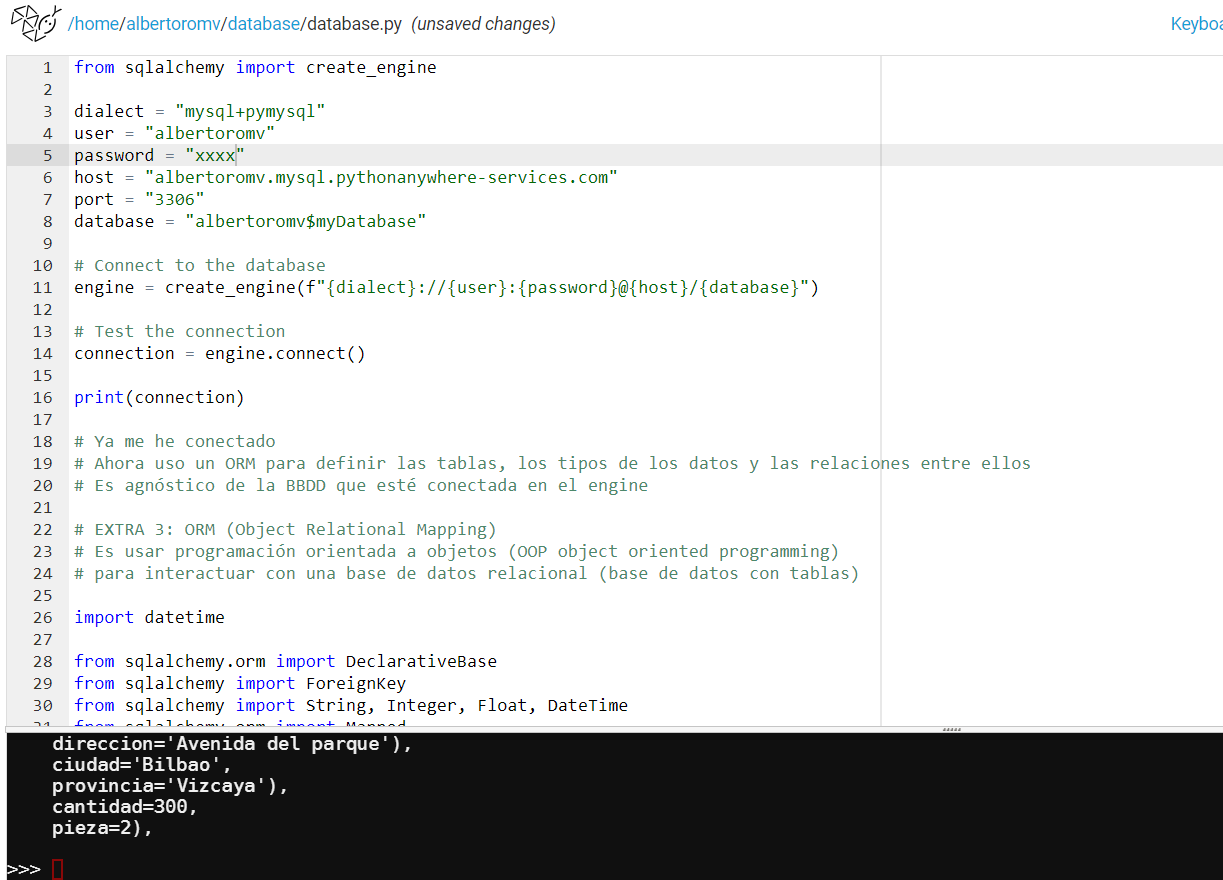

Guardamos en Save y lo ejecutamos:
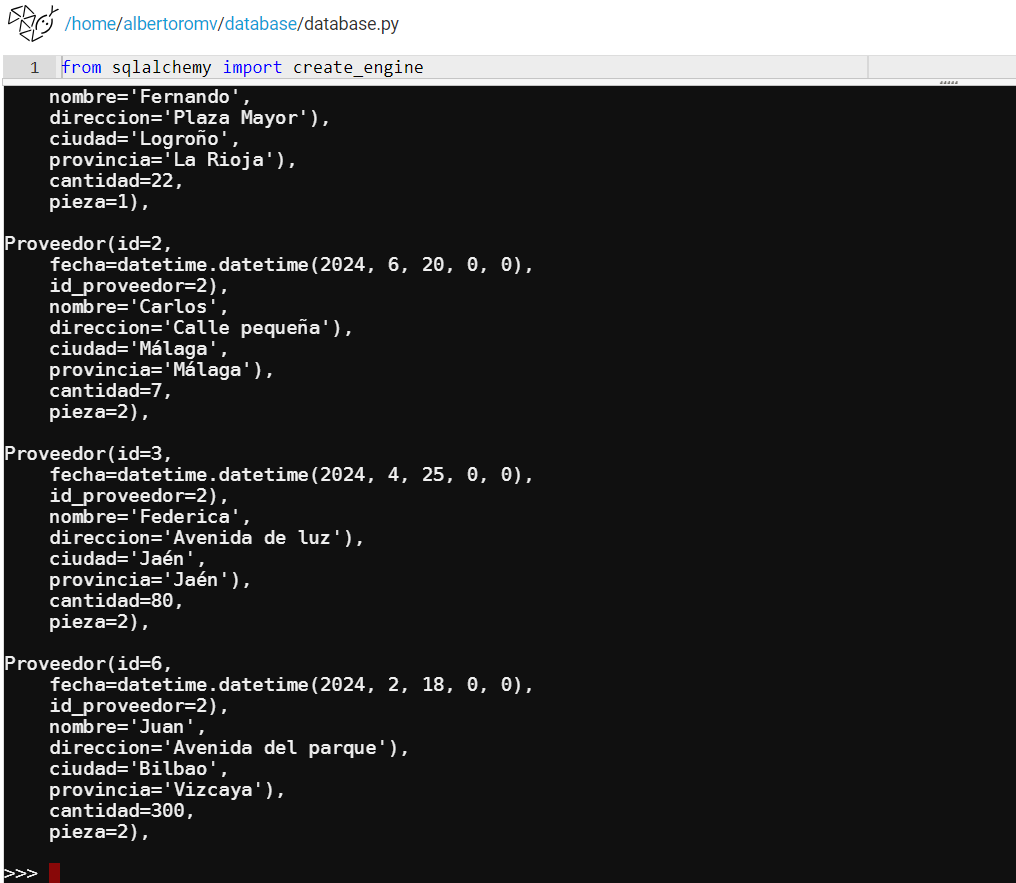

Compruebo en la consola de MySQL:

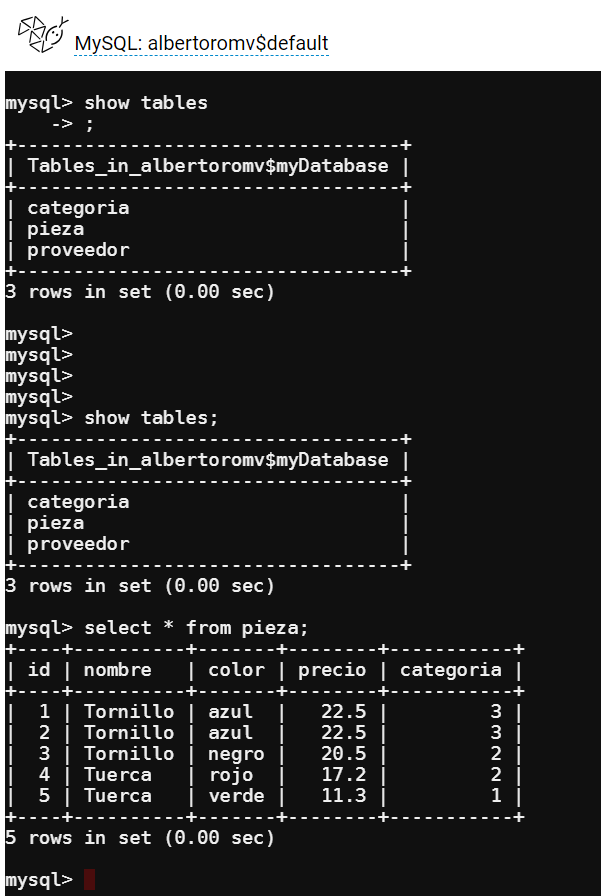
